

> By Blessing


# **How To Use R in Google Colaboratory (colab for short)**

> To start R in Colab:
*   Hover your mouse to the Runtime tab on the header and click
*   Select the "Change runtime type"
*   Click the drop-down icon 🔽 below the Runtime type to select R
*   Then, click on save or you may want to switch the processing unit and then save
*   Start by installing and loading your packages.

*Unfortunately, you'll have to install and load packages everytime but at least there's a way to reduce downtime ❌. Sorry, sometimes it's hard to eat your cake and have it.*



> Colab gives you free computing resources: around 13 GB of RAM and 100 GB of storage Disk ✅. There are premium options if you require more RAM or Disk.



> A few shortcuts:


*   Ctrl+M+B: Create new code chunk
*   Ctrl+M+D: Delete code chuck








Install and load packages

In [ ]:
#----------------------------------------------------------------------#
# PRELIMINARY
# Installing and loading packages and suppressing messages from packages
#----------------------------------------------------------------------#

#Sorry I don't like unnecessary messages
suppressMessages({install.packages("tidyverse")
install.packages("ggplot2")
install.packages("BGLR")
library(tidyverse)
library(ggplot2)
library(BGLR)
})

Load Data

In [ ]:
data1 <- mtcars|>
  mutate(across(c(cyl,vs,am,gear, carb), as.factor)) #convert categorical variables to factor
head(data1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Summarize the mean of all continuous variable for the three levels of gear

In [ ]:
data1|>
  group_by(gear)|>
  select(-cyl,-vs,-am,-carb)|> #drop categorical variables
  summarise_all(mean)

gear,mpg,disp,hp,drat,wt,qsec
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,16.10667,326.3000,176.1333,3.132667,3.892600,17.692
4,24.53333,123.0167,89.5000,4.043333,2.616667,18.965
5,21.38000,202.4800,195.6000,3.916000,2.632600,15.640


Create a plot of mpg for the three levels of gear

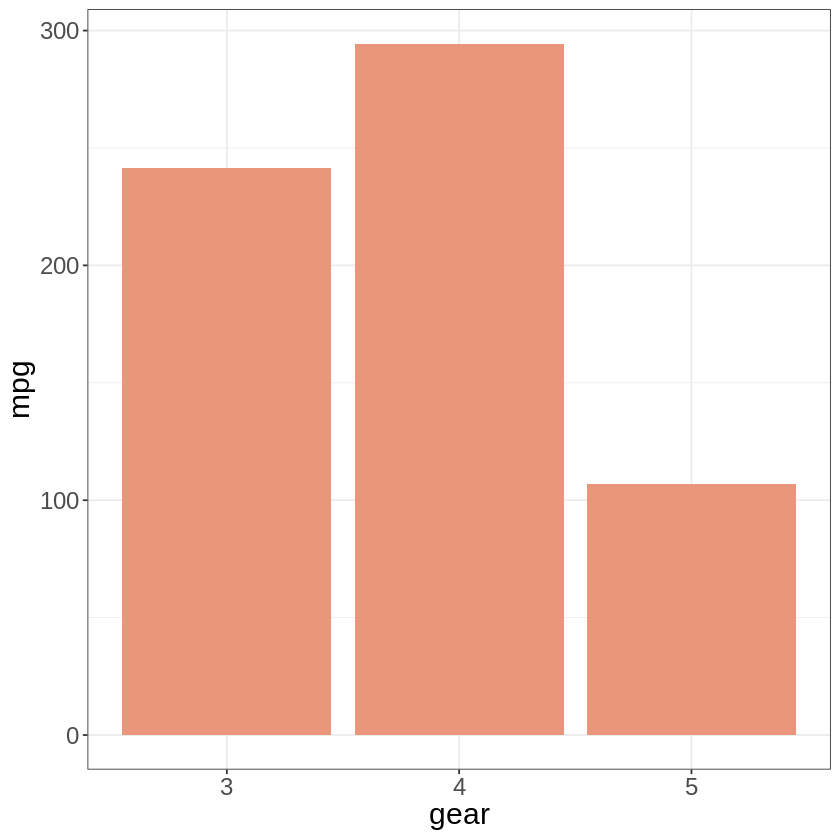

In [ ]:
ggplot(data1, aes(x=gear, y=mpg), fill=gear)+
  geom_bar(stat = "identity", fill="darksalmon")+
  labs(x= "gear", y="mpg")+
  theme_bw()+
  theme(text = element_text(size=18))

Create a plot of hp for the two levels of transmission

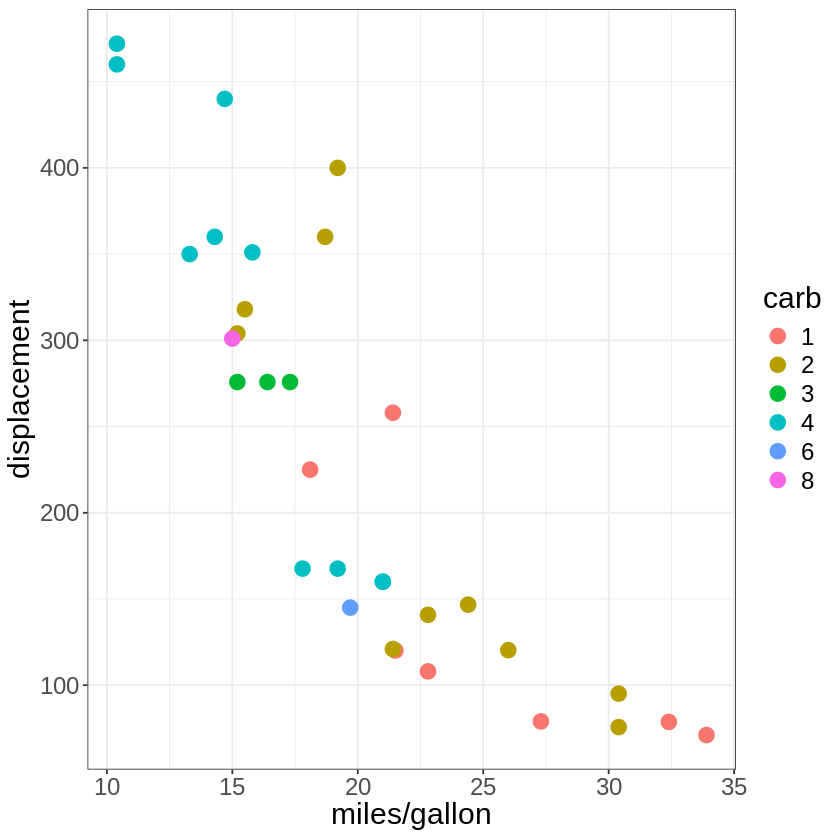

In [ ]:
ggplot(data1, aes(x=mpg, y=disp))+
  geom_point(aes(color = carb), size = 4)+
  labs(x= "miles/gallon", y="displacement")+
  theme_bw()+
  theme(text = element_text(size=18))

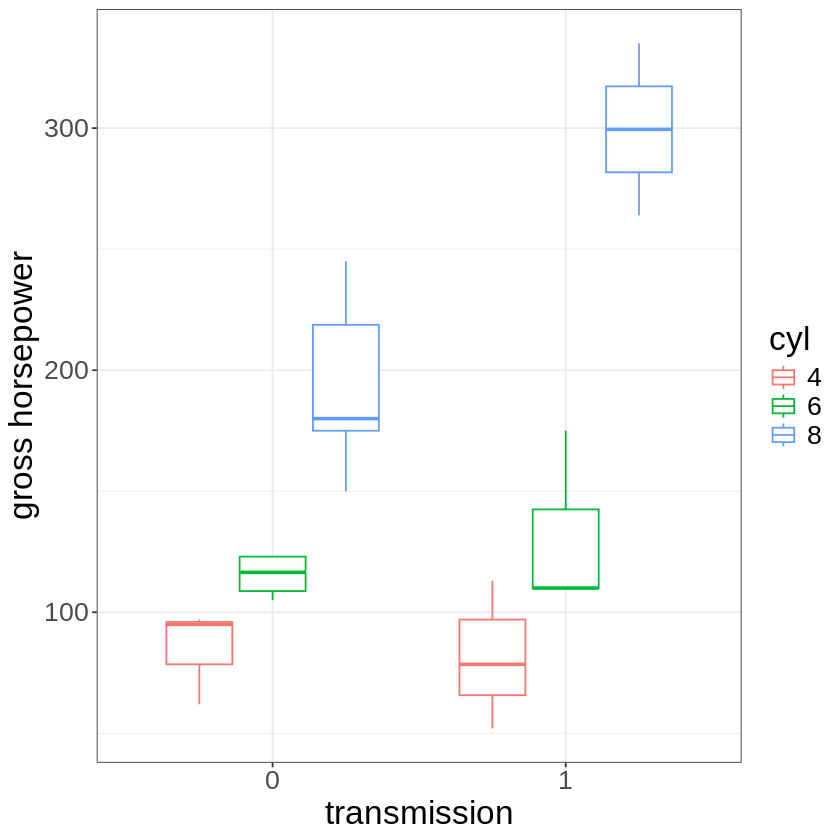

In [ ]:
ggplot(data1, aes(x=am, y=hp))+
  geom_boxplot(aes(color = cyl))+
  labs(x= "transmission", y="gross horsepower")+
  theme_bw()+
  theme(text = element_text(size=20))

Simple linear regression using mpg as response variable and hp, gear, and cyl as predictor variables

In [ ]:
data_lm <- lm(mpg ~ hp + gear + cyl, data1)
summary(data_lm)


Call:
lm(formula = mpg ~ hp + gear + cyl, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1278 -2.2224 -0.1869  2.0726  6.6175 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.58225    1.96733  14.528 5.43e-14 ***
hp          -0.05672    0.01909  -2.971  0.00631 ** 
gear4        2.38709    1.73451   1.376  0.18049    
gear5        5.67868    2.15519   2.635  0.01400 *  
cyl6        -4.07859    1.67630  -2.433  0.02215 *  
cyl8        -2.42678    3.22987  -0.751  0.45919    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.901 on 26 degrees of freedom
Multiple R-squared:  0.8057,	Adjusted R-squared:  0.7684 
F-statistic: 21.57 on 5 and 26 DF,  p-value: 1.683e-08


Perform a foward step-wise regression analysis

In [ ]:
intercept_only <- lm(disp~1, data1) #intercept only
summary(intercept_only)


Call:
lm(formula = disp ~ 1, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.62 -109.90  -34.42   95.28  241.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   230.72      21.91   10.53 9.19e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123.9 on 31 degrees of freedom


In [ ]:
full.model<- lm(disp~., data1) #full model
summary(full.model)


Call:
lm(formula = disp ~ ., data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0758 -10.7404  -0.6812  10.3976  30.3527 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -170.0584   157.2725  -1.081 0.296643    
mpg            2.1508     1.9301   1.114 0.282673    
cyl6          49.8750    20.5421   2.428 0.028237 *  
cyl8         130.7639    44.2951   2.952 0.009891 ** 
hp             0.4128     0.3205   1.288 0.217350    
drat          -1.6644    19.4589  -0.086 0.932969    
wt            65.6946    13.6027   4.830 0.000221 ***
qsec           2.8331     7.2768   0.389 0.702503    
vs1           -3.0496    22.6550  -0.135 0.894708    
am1           28.8140    23.9881   1.201 0.248305    
gear4        -45.6043    27.2004  -1.677 0.114331    
gear5        -15.8469    29.2190  -0.542 0.595546    
carb2          7.3315    18.0386   0.406 0.690162    
carb3        -92.7854    24.0370  -3.860 0.001542 ** 
carb4        -17.0038    34

In [ ]:
# stepwise analysis from intercept only to full model using AIC to select the best model

forward_step <- step(intercept_only, direction = c("forward"), scope = formula(full.model))

# to suppress verbose output, you can use trace=0 as below
# forward_step <- step(intercept_only, direction = c("forward"), scope = formula(full.model), trace = 0)

Start:  AIC=309.45
disp ~ 1

       Df Sum of Sq    RSS    AIC
+ cyl   2    398891  77294 255.27
+ wt    1    375476 100709 261.74
+ mpg   1    342064 134121 270.90
+ hp    1    297901 178284 280.01
+ gear  2    280221 195964 285.04
+ vs    1    240326 235859 288.97
+ drat  1    240189 235995 288.99
+ am    1    166450 309735 297.69
+ qsec  1     89567 386617 304.78
+ carb  5    149586 326599 307.38
<none>              476185 309.45

Step:  AIC=255.27
disp ~ cyl

       Df Sum of Sq   RSS    AIC
+ wt    1     40011 37283 233.94
+ carb  5     31532 45762 248.50
+ mpg   1     14789 62505 250.47
+ am    1      9539 67755 253.05
+ qsec  1      7386 69908 254.05
+ drat  1      7048 70246 254.21
<none>              77294 255.27
+ gear  2      8547 68747 255.52
+ vs    1      1856 75438 256.49
+ hp    1       518 76776 257.05

Step:  AIC=233.94
disp ~ cyl + wt

       Df Sum of Sq   RSS    AIC
+ carb  5   22434.0 14849 214.48
+ gear  2    4816.9 32466 233.51
<none>              37283 233.94
+

In [ ]:
forward_step$coefficients

(Intercept)         cyl6         cyl8           wt        carb2        carb3 
-130.4297248   48.2529299  126.5932543   68.9890003    5.5163693  -93.6739933 
       carb4        carb6        carb8        gear4        gear5          am1 
 -21.9612920  -85.6016417 -116.0532738  -43.9356763  -16.2107526   25.3758291 
          hp          mpg 
   0.3953557    2.1993191

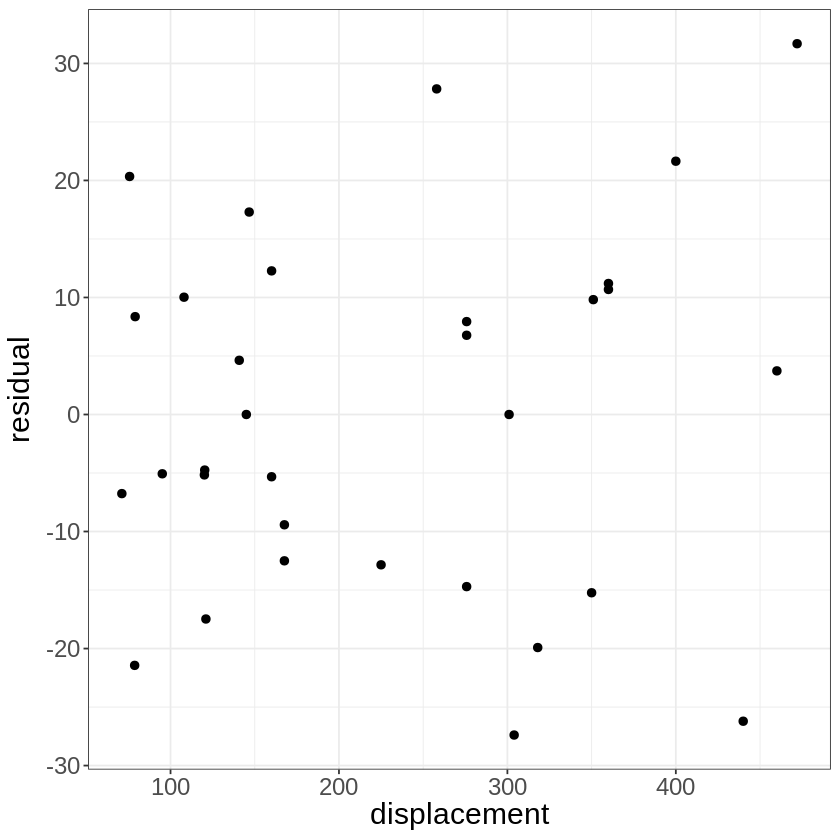

In [ ]:
plot_df <- data.frame(x=forward_step$model$disp, y=forward_step$residuals)
ggplot(plot_df, aes(x, y))+
  geom_point(size = 2)+
  labs(x= "displacement", y="residual")+
  theme_bw()+
  theme(text = element_text(size=18))

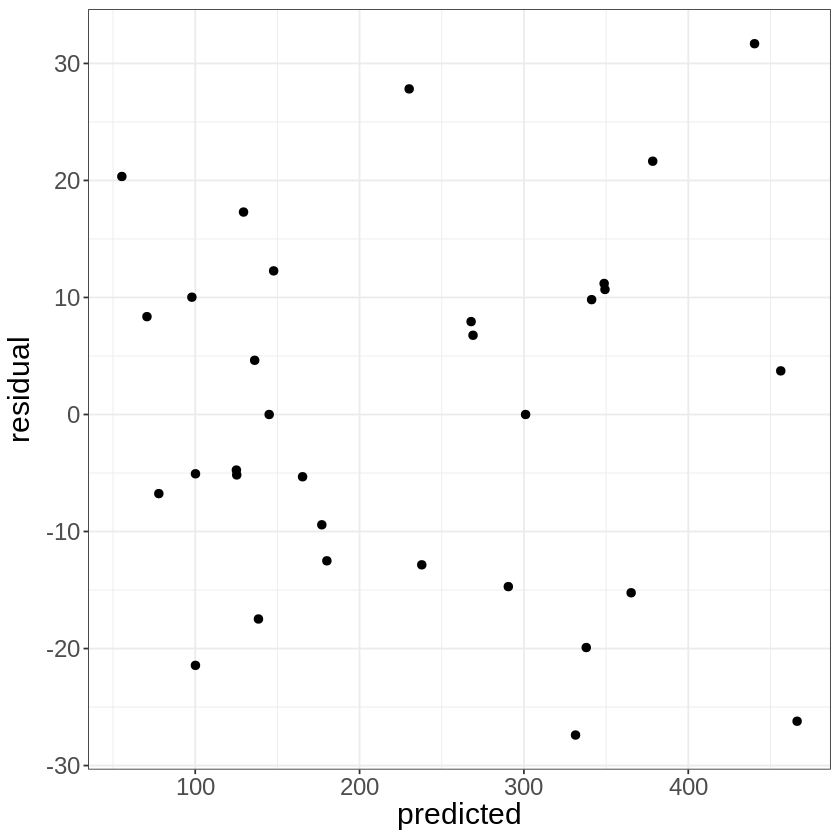

In [ ]:
plot_df2 <- data.frame(x=forward_step$fitted.values, y=forward_step$residuals)
ggplot(plot_df2, aes(x, y))+
  geom_point(size = 2)+
  labs(x= "predicted", y="residual")+
  theme_bw()+
  theme(text = element_text(size=18))

# Let's do a little genomic analysis using BGLR

In [ ]:

data(wheat) # The wheat data is available in the BGLR package
dim(wheat.X) #genotype
dim(wheat.Y) #phenotype

 nIter=1000
 burnIn=200

## RR-BLUP based method
 X=scale(wheat.X)/sqrt(ncol(wheat.X))
 y=wheat.Y[,1]

 fm1=BGLR( y=y,ETA=list(mrk=list(X=X,model='BRR')),
	   nIter=nIter,burnIn=burnIn,saveAt='brr_', verbose=F
 	 )

 varE=scan('brr_varE.dat')
 varU=scan('brr_ETA_mrk_varB.dat')
 h2_1=varU/(varU+varE)
 #h2_1

[1]  599 1279

[1] 599   4

In [ ]:
#Check the dimension of scaled genotype and marker effects
dim(X)
length(fm1$ETA$mrk$b)
 bhat <- fm1$ETA$mrk$b #This is the marker effects

[1]  599 1279

[1] 1279

In [ ]:
#obtain the estimated breeding value
uhat <- X%*%fm1$ETA[[1]]$b

In [ ]:
 #GBLUP-based method
 G=tcrossprod(X)
 fm2=BGLR( y=y,ETA=list(G=list(K=G,model='RKHS')),
	   nIter=nIter,burnIn=burnIn,saveAt='eig_', verbose=F
	 )
 varE=scan( 'eig_varE.dat')
 varU=scan('eig_ETA_G_varU.dat')
 h2_2=varU/(varU+varE)

In [ ]:
#obtain the estimated breeding values
uhat2 <- fm2$ETA$G$u

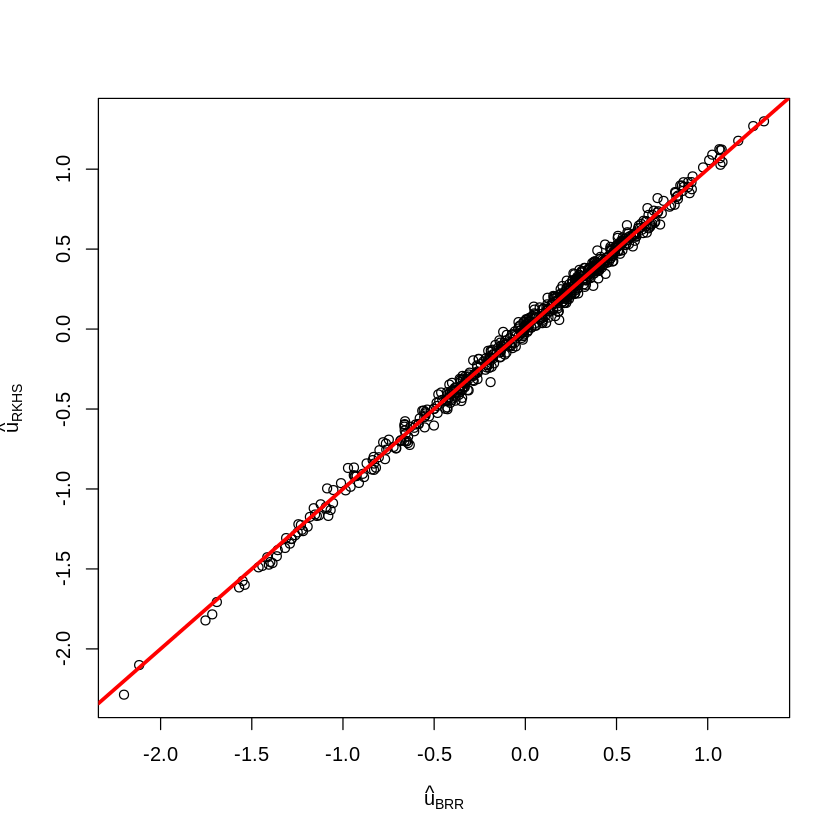

In [ ]:
#Compare uhat from both methods

plot(uhat, uhat2, xlab = expression(hat(u)[BRR]), ylab=expression(hat(u)[RKHS]))
abline(0,1, col="red", lwd=3)

> Note. I can also backtransform the results from method 2 to obtain marker effect





Feel free to explore Colab for your work. I hope this is useful and have a nice ride ✈

For ✍ and 📋, I can demonstrate on LaTeX if needed.



> References


*   https://www.statology.org/stepwise-regression-r/
*   BGLR: https://github.com/gdlc/BGLR-R/blob/master/inst/md/GBLUP.md
*   https://www.tanyongsheng.com/note/how-to-quickly-re-install-r-packages-in-google-colab/#:~:text=Unfortunately%2C%20installing%20these%20packages%20on,another%205%20minutes%20again%20each%E2%80%A6



